In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape, GaussianNoise
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import SGD
from tensorflow import reshape

In [2]:
(X_train, y_train), (X_test, y_test)  = mnist.load_data()

In [5]:
X_train.shape
X_test.shape

(10000, 28, 28)

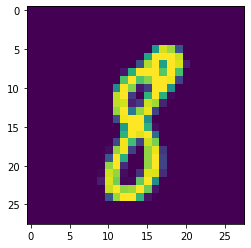

In [47]:
plt.imshow(X_train[300])

In [48]:
# temp = np.array([reshape(i, shape=[1,784]) for i in X_train])
# 28*28 
# np.array(reshape(X_train[0], shape=[1, 784])).shape
# temp.shape

In [49]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28, 28]))
encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

In [50]:
decoder = Sequential()
decoder.add(Dense(50, activation='relu'))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))
decoder.add(Reshape([28, 28]))

In [51]:
auto_encoder = Sequential([encoder, decoder])
auto_encoder.compile(loss='binary_crossentropy', optimizer=SGD(lr=1.5))

In [52]:
auto_encoder.summary()
encoder.summary()
decoder.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_7 (Sequential)    (None, 25)                420625    
_________________________________________________________________
sequential_8 (Sequential)    (None, 28, 28)            421384    
Total params: 842,009
Trainable params: 842,009
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_21 (Dense)             (None, 200)               80200     
__________________________

In [53]:
X_train = X_train/255
X_test = X_test/255
X_train[2].shape
X_train.shape

(60000, 28, 28)

In [54]:
auto_encoder.fit(X_train, X_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2514
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1949
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1600
Epoch 4/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1471
Epoch 5/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1414


In [55]:
passed_images = auto_encoder(X_test[:10])
compressed_image = encoder(X_test[:10])

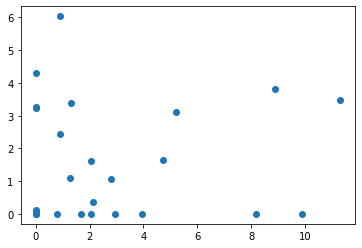

In [56]:
plt.scatter(compressed_image[0], compressed_image[1])

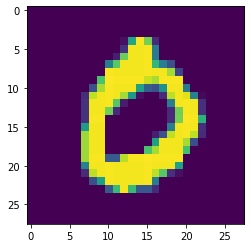

attempting reconstruction of image


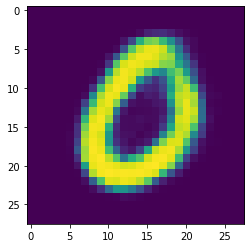

In [57]:
n = 3
plt.imshow(X_test[n])
plt.show()
print('attempting reconstruction of image')
plt.imshow(passed_images[n])

In [58]:
sample = GaussianNoise(0.3)

In [59]:
noise = sample(X_test[:10], training=True)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



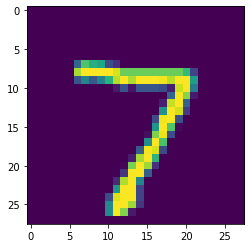

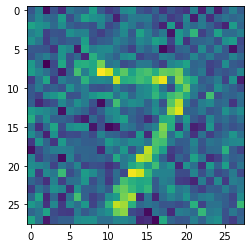

In [60]:
n = 0
plt.imshow(X_test[n])
plt.show()
plt.imshow(noise[n])

In [61]:
import tensorflow as tf

In [62]:
tf.random.set_seed = 101
np.random.seed = 101

encoder = Sequential()
encoder.add(Flatten(input_shape=[28, 28]))
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

In [63]:
decoder = Sequential()
decoder.add(Dense(50, activation='relu'))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))
decoder.add(Reshape([28, 28]))

In [64]:
noise_remover = Sequential([encoder, decoder])

In [65]:
noise_remover.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [66]:
noise_remover.fit(X_train, X_train, epochs=8, batch_size=500)

Epoch 1/8
120/120 [==============================] - 3s 25ms/step - loss: 0.2835 - accuracy: 0.0771
Epoch 2/8
120/120 [==============================] - 4s 29ms/step - loss: 0.2110 - accuracy: 0.1288
Epoch 3/8
120/120 [==============================] - 3s 25ms/step - loss: 0.1673 - accuracy: 0.1782
Epoch 4/8
120/120 [==============================] - 3s 25ms/step - loss: 0.1504 - accuracy: 0.2003
Epoch 5/8
120/120 [==============================] - 3s 25ms/step - loss: 0.1427 - accuracy: 0.2130
Epoch 6/8
120/120 [==============================] - 3s 26ms/step - loss: 0.1369 - accuracy: 0.2210
Epoch 7/8
120/120 [==============================] - 3s 25ms/step - loss: 0.1322 - accuracy: 0.2257
Epoch 8/8
120/120 [==============================] - 3s 25ms/step - loss: 0.1286 - accuracy: 0.2312


In [67]:
noisy_data = sample(X_test[:10], training=True)
denoised = noise_remover(noisy_data)

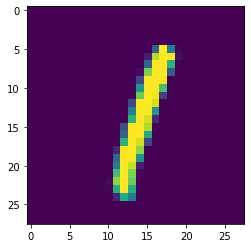

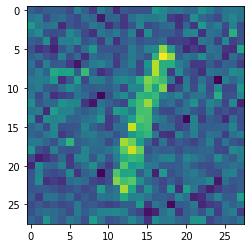

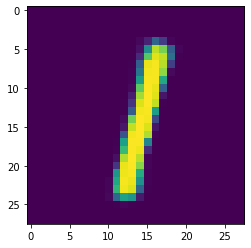

In [68]:
n = 5
plt.imshow(X_test[n])
plt.show()

plt.imshow(noisy_data[n])
plt.show()

plt.imshow(denoised[n])